### **TMLC Fellowship Task**

**Name:** Anuganti Suresh

----------------------------------

#### **NLP: Sentiment Classification**

**Problem Statement:** Classify the tweets by implementing any NLP approach for **Sentiment analysis** on the provided dataset. The **objective** is to recognize whether the given **tweet is oriented as negative (-1), neutral (0), or positive (1) tone.** Focus majorly on unique preprocessing techniques.

#### **Table of Contents**

* [1) Import Required Libraries](#1)

* [2) Load Data](#2)

* [3) EDA (Exploratory Data Analysis)](#3)

* [4) Text Cleaning or Preprocessing](#4)

* [5) Making the bag of words via sparse matrix](#5)

#### **1) Import Required Libraries**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **2) Load Data**

In [4]:
train = pd.read_csv("/content/drive/MyDrive/TMLC/twitter sentiment.zip")
train.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
train.shape

(162980, 2)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


#### **3) EDA (Exploratory Data Analysis)**

In [7]:
zero = train[train['category']==0]
zero

,clean_text,category
1,talk all the nonsense and continue all the dra...,0.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
13,one vote can make all the difference anil kapo...,0.0
...,...,...
162968,case dont look candidate then that case person...,0.0
162971,congress veteran sudhakar reddy joins bjp afte...,0.0
162974,save your agenda peddling ’ had with terror at...,0.0
162977,did you cover her interaction forum where she ...,0.0


In [8]:
positive = train[train['category']==1]
positive

,clean_text,category
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0
...,...,...
162969,objective cover everything from akhlaq ramalin...,1.0
162970,raga knows dat wont spared modi courts for his...,1.0
162972,engine growth modi unveils indias first 12000 ...,1.0
162973,modi promised 2014 lok sabha elections that be...,1.0


In [9]:
negative = train[train['category']==-1]
negative

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
15,vote such party and leadershipwho can take fas...,-1.0
19,didn’ write chowkidar does mean ’ anti modi tr...,-1.0
21,with firm belief the leadership shri narendra ...,-1.0
23,sultanpur uttar pradesh loksabha candidate sel...,-1.0
...,...,...
162956,when narender modi contested two seats was not...,-1.0
162962,modi decimates congress front crores congress ...,-1.0
162967,azamgarh please poor working requirement jogia...,-1.0
162975,why these 456 crores paid neerav modi not reco...,-1.0


In [10]:
train.isnull().sum()

clean_text    4
category      7
dtype: int64

In [11]:
train.drop(train[train['clean_text'].isna()].index, inplace=True)
train.drop(train[train['category'].isna()].index, inplace=True)

#### **clean_text**

In [12]:
train['clean_text'].value_counts()

congratulations for makes proud for his dedicated service towards india\n                                                                                                                                    1
its shows yours jealous what congress couldnt able years modi did that within years thats called made india and congress within years made only soniya rahul priyanka made italy                             1
income tax department auctioned the artworks owned the absconding diamantaire nirav modi\n                                                                                                                   1
proud moment for indians worldwide india successfully shoots down satellite space modi times india via                                                                                                       1
gdp never problem modicoz can increase juz like dat coz think gdp juz number which can modified whenever wants and already crore jobs were created him many them are pakoda 

#### **Category**

In [13]:
train['category'].unique()

array([-1.,  0.,  1.])

In [14]:
train['category'].value_counts()

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

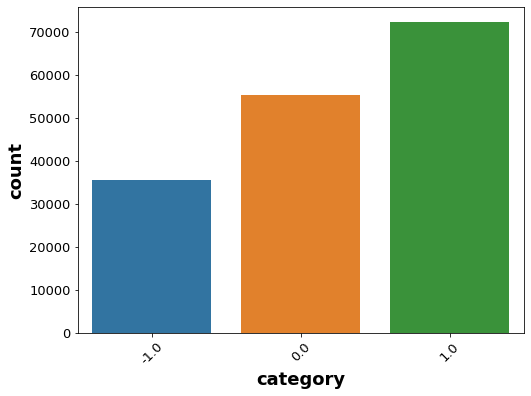

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(train['category'])
plt.xlabel("category", fontsize=18, fontweight="bold")
plt.ylabel("count", fontsize=18, fontweight="bold")
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
plt.show()

#### **Plot the WordCloud**

In [16]:
sentences = train['clean_text'].to_list()
sentences[:10]

['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'talk all the nonsense and continue all the drama will vote for modi ',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'kiya tho refresh maarkefir comment karo ',
 'surat women perform yagna seeks divine grace for narendra modi become again\n',
 'this comes from cabinet which has scholars like modi smriti and hema time introspect',
 'with upcoming election india saga going important pair look current m

In [17]:
len(sentences)

162969

In [18]:
single_sentence = ' '.join(sentences)
single_sentence[:500]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples talk all the nonsense and continue all the drama will vote for modi  what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax asking his supporters prefix chowkidar their names modi did great service now there confusion what rea'

In [19]:
from wordcloud import WordCloud

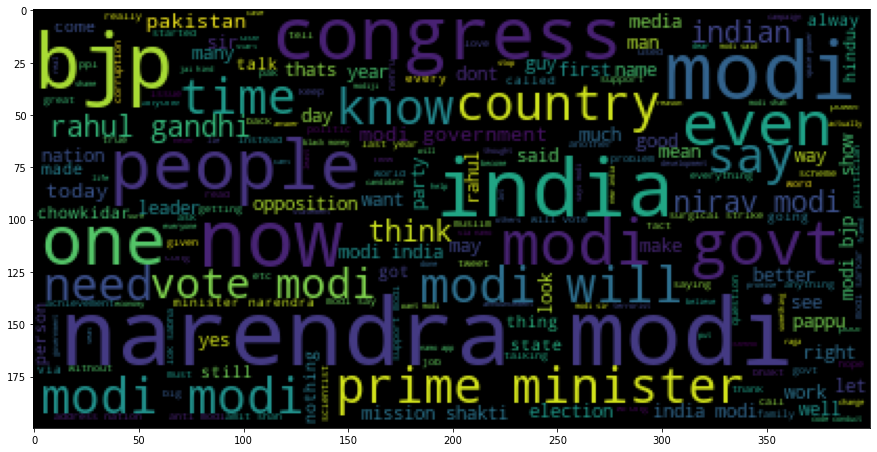

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(single_sentence))

### Using count vectorizer and one vs rest approach

In [28]:
vec = CountVectorizer(max_features=10000)
vec.fit(train['clean_text'])

trn, val = train_test_split(train, test_size=0.3, random_state=42)

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

In [29]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.948947659078358

In [30]:
print(clf.score(val_abs, val['category']))

0.948947659078358


In [31]:
confusion_matrix(val['category'], val_preds)

array([[ 9572,   264,   855],
       [  198, 16215,   231],
       [  687,   261, 20608]])

In [32]:
print(classification_report(val['category'], val_preds))

              precision    recall  f1-score   support

        -1.0       0.92      0.90      0.91     10691
         0.0       0.97      0.97      0.97     16644
         1.0       0.95      0.96      0.95     21556

    accuracy                           0.95     48891
   macro avg       0.94      0.94      0.94     48891
weighted avg       0.95      0.95      0.95     48891



### **Tfidf Vectorizer**

In [34]:
vec = TfidfVectorizer(max_features=10000)
_ = vec.fit(list(train['clean_text']))

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

In [35]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
_ = clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.9445705753615184

In [36]:
print(clf.score(val_abs, val['category']))

0.9445705753615184


### **Word embeddings**

In [38]:
# tokenize
tok = Tokenizer(num_words = 1000000)
# fit
tok.fit_on_texts(train['clean_text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [39]:
X_trn = tok.texts_to_sequences(trn['clean_text'])
X_val = tok.texts_to_sequences(val['clean_text'])

In [40]:
maxlen = 200
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [41]:
embedding_dim = 50
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))

model.add(Flatten())
model.add(Dense(200, activation='relu', name = 'Fully_Connected'))
model.add(Dense(1, activation='sigmoid', name = 'Output'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 50)           5683950   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
Fully_Connected (Dense)      (None, 200)               2000200   
_________________________________________________________________
Output (Dense)               (None, 1)                 201       
Total params: 7,684,351
Trainable params: 7,684,351
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_trn, trn['category'], validation_data=(X_val, val['category']), verbose=True, epochs=20, batch_size=256,
          callbacks = [tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/20
446/446 [==============================] - 61s 135ms/step - loss: -24.5461 - accuracy: 0.5045 - val_loss: -127.3956 - val_accuracy: 0.5427
Epoch 2/20
446/446 [==============================] - 55s 124ms/step - loss: -684.4818 - accuracy: 0.5650 - val_loss: -1406.6427 - val_accuracy: 0.5632
Epoch 3/20
446/446 [==============================] - 55s 124ms/step - loss: -3345.1914 - accuracy: 0.5653 - val_loss: -4811.5684 - val_accuracy: 0.5409
Epoch 4/20
446/446 [==============================] - 56s 126ms/step - loss: -8972.7412 - accuracy: 0.5659 - val_loss: -10934.5117 - val_accuracy: 0.5464
Epoch 5/20
446/446 [==============================] - 58s 131ms/step - loss: -18180.6035 - accuracy: 0.5659 - val_loss: -20105.9043 - val_accuracy: 0.5431
Epoch 6/20
446/446 [==============================] - 57s 127ms/step - loss: -31367.9434 - accuracy: 0.5654 - val_loss: -32672.7148 - val_accuracy: 0.5519
Epoch 7/20
446/446 [==============================] - 57s 129ms/step - loss: -488

In [ ]:
val_preds = model.predict(X_val)

f1_score(val['category'], val_preds, average='micro')

In [ ]:
accuracy_score(val['category'], val_preds)

In [ ]:
confusion_matrix(val['category'], val_preds)

In [ ]:
print(classification_report(val['category'], val_preds))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(train['clean_text']).toarray()

In [ ]:
vectorizer.get_feature_names()[:10]

In [ ]:
tweets_countvectorizer

#### **Naive Bayes**

In [ ]:
# Let's define the features(X) and labels(y) for our model
X = tweets_countvectorizer
X

In [ ]:
y = tweets_df['label']
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

#### **Confusion Matrix**

In [ ]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='.2f')

In [ ]:
print(classification_report(y_test, y_predict_test))